In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# '''Here we are importing Dataset'''
df=pd.read_csv('Advertising.csv')

In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
#finding number of rows and columns
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

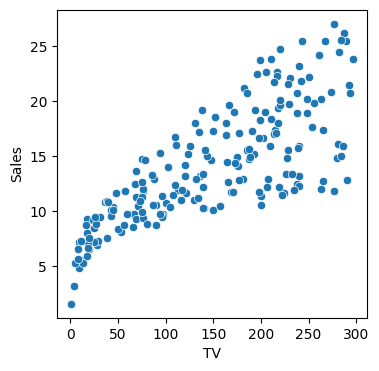

In [9]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

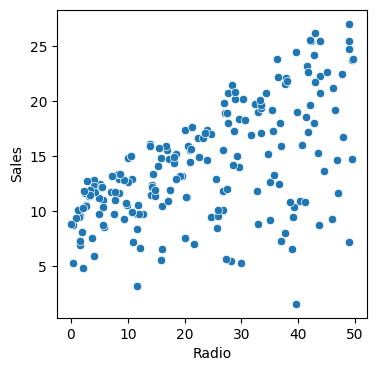

In [10]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

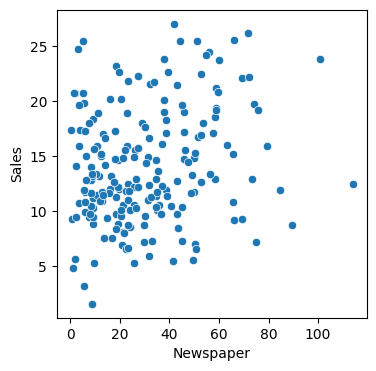

In [11]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

In [12]:
#splitting the datset into X,the attributes and y,the target variable
X=df.drop('Sales',axis=1)

In [13]:
X

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [14]:
y=df['Sales']

In [15]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [16]:

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [17]:

model= LinearRegression()

In [18]:
#fitting the model to the dataset
model.fit(X_train,y_train)

LinearRegression()

In [19]:
#predictions
y_predictions=model.predict(X_test)
y_predictions

array([10.24664397,  7.3067958 ,  7.01313011, 24.0629912 , 11.84538583,
        6.3623126 , 12.97367539, 15.01392577, 10.95137181, 16.2302401 ,
       22.94764396,  9.07892877, 10.29830431, 15.372556  , 11.63358138,
       12.38729183, 18.91996453, 10.72601207, 16.03372676, 17.36589369,
       23.85225051,  9.51048184, 15.25366204, 12.2528663 ,  5.81346738,
       15.19998588, 12.12398331, 20.74762723, 13.36651757,  9.16548788,
       13.0430809 , 21.47977498, 18.01828076, 21.14170908,  6.74096317,
        5.9527019 ,  7.82515133, 13.21661502, 14.72150697,  6.18172688])

In [20]:
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_predictions})
print(results.head(10))

   Actual  Predicted
0    11.3  10.246644
1     8.4   7.306796
2     8.7   7.013130
3    25.4  24.062991
4    11.7  11.845386
5     8.7   6.362313
6     7.2  12.973675
7    13.2  15.013926
8     9.2  10.951372
9    16.6  16.230240


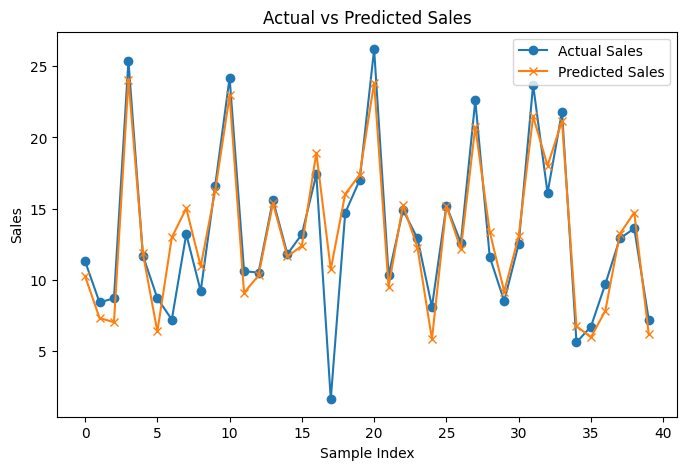

In [21]:

plt.figure(figsize=(8,5))
plt.plot(range(len(y_test)), y_test.values, label="Actual Sales", marker="o")
plt.plot(range(len(y_predictions)), y_predictions, label="Predicted Sales", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

In [22]:
# Lets evaluate the model for its accuracy using various metrics such as RMSE and R-Squared


print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 1.4158480868317487
RMSE: 2.125203007295874
R-Squared 0.8283777385812956


In [24]:


joblib.dump(model, 'Sales_predictor_model.pkl')
print("Model saved as 'Sales_predictor_model.pkl'")

Model saved as 'Sales_predictor_model.pkl'


In [25]:
from google.colab import files
files.download("Sales_predictor_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>